# Regression
## Introduction

Supervised machine learning algorithms can be broadly divided into two types: **regression algorithms** and **classification algorithms**. The goal for regression algorithms is to predict numeric y value, such as the price of a car.

In this notebook, we will focus on regression, using an example based on [Medical Cost Personal Dataset from Kaggle](https://www.kaggle.com/mirichoi0218/insurance). 

## Explore the data

The first step in any machine learning project is to explore the data that we will use to train a model. We need to understand the relationships between its attributes and correlation between the features and the label our model try to predict. This may require some work to deal with missing values, errors, outlier values, incompatible formating, deriving new feature columns (a process known as feature engineering), encoding categorical features and normalizing numeric features.

Let's start by loading the data as a Pandas DataFrame and viewing the first few rows and informations about columns. 

In [1]:
import pandas as pd

data_path = r'Data\insurance.csv'

insurance_data = pd.read_csv(data_path)
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


The data consists of the following columns:

- **age**: age of primary beneficiary,
- **sex**: insurance contractor gender, female, male,
- **bmi**: body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight ($\frac{kg}{m^{2}}$) using the ratio of height to weight, ideally 18.5 to 24.99,
- **children**: number of children covered by health insurance / Number of dependents,
- **smoker**: smoking,
- **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest,
- **charges**: individual medical costs billed by health insurance.

The last column - **charges** - represents the label (the y value) which our model will try to predict. The other columns which can be used to predict values of y are called features (x values).

Now, we see how our data looks like. As we say earlier we need to understand our data better, so let's plot basic information about the data such as types, number of values and missing values.

In [2]:
# Get information about number of values and theys type
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
# Check each column for missing values
pd.isna(insurance_data.any())

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

Dataset consist of 1338 data rows and there is no missing values. Three columns are object type, we will transform it later. Let's save names of categorical and numerical features, after that we can start our analysis of the data by examining a few key descriptive statistics. We can use **describe** method used on dataframe's to generate these.

In [4]:
# Save object type (categorical) and numeric type features names
categorical_features = [name for name in insurance_data.columns if insurance_data[name].dtype=='O']
numeric_features = [name for name in insurance_data.columns if insurance_data[name].dtype!='O']

In [5]:
insurance_data[numeric_features].describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# Remove label column, we will analyze it separatelly
numeric_features.remove('charges')

The statistics give us some infromation about the distribution of the data. From this, we can read that the mean charges is around 13270 and there is a comparatively large standard deviation.

Data visualization can give us a clearer idea of the distribution of charges. Commonly used plot types for numeric data visualization are boxplots, histograms or correlation plots. Let's use **matplotlib** and **seaborn** libraries to see boxplot and histogram for charges label.

<ipython-input-7-f294949f8cfd>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


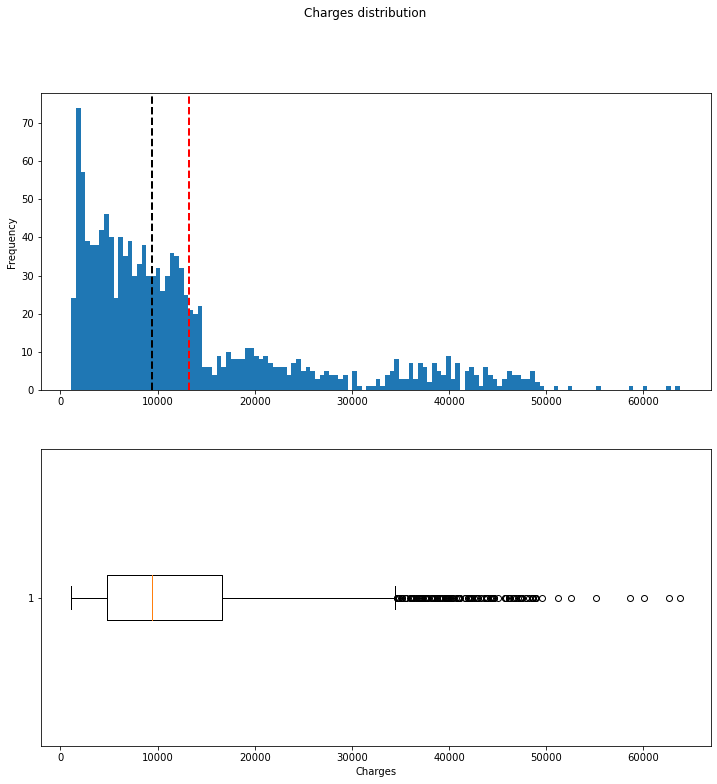

In [7]:
import matplotlib.pyplot as plt

# Plots will be shown inline in Jupyter notebook
%matplotlib inline

# Get the label column
label = insurance_data['charges']

# Createa figure and a grid of subplots
fig, ax = plt.subplots(2, 1, figsize = (12,12))

# Plot the histogram
ax[0].hist(label, bins=130)
ax[0].set_ylabel('Frequency')

# Add mean, median and mode lines
ax[0].axvline(label.mean(), color='red', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='black', linestyle='dashed', linewidth=2)

# Plot the boxplot
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Charges')

# Add a title
fig.suptitle('Charges distribution')

# Show the figure
fig.show()

The first thing that we can observe is that our data is skewed to the right - mean and median values of charges are closer to the low end of data range, median is higher than the mode and median is lower than the mean. Based on the boxplot, most of the data (99,3%) is between 1100 and around 34500 charges. The small circles on the right are outliers, that means the values which are unusually high or low beyond the typical range of most of the data.

Let's get some information about numeric features distribution.

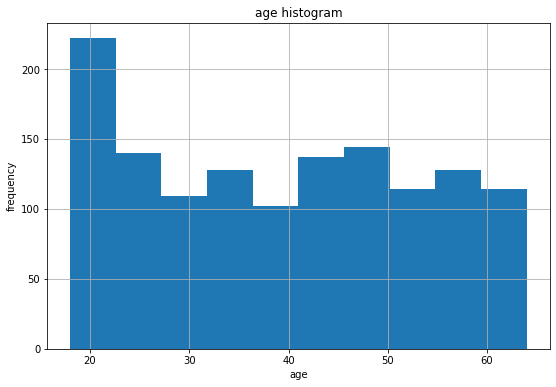

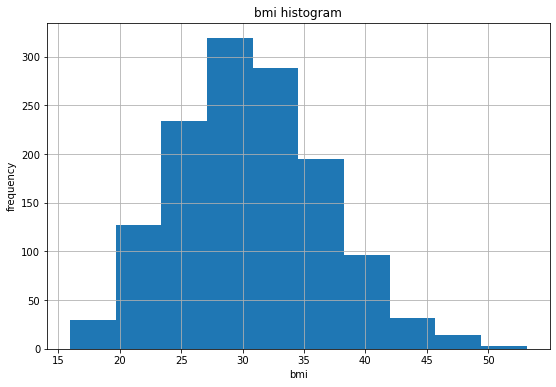

In [8]:
for column_name in ['age','bmi']:
    fig = plt.figure(figsize=(9,6))
    # Get the current Axes instance on the current figure
    ax = fig.gca()
    column = insurance_data[column_name]
    column.hist(ax=ax)
    ax.set_title(column_name+' histogram')
    ax.set_ylabel('frequency')
    ax.set_xlabel(column_name)
plt.show()

The largest sample of respondents belongs to peoples under 25. BMI hisogram seem to be normally distributed.
>In probability theory, a normal distribution is a type of continous probability distribution. The normal distribution is sometimes informally called a bell curve, based on her shape.

Because of the fact that children feature consist of 5 different values it is better to plot it using barplot. Let's continue to our categorical features. Categorical values aren't continous numbers on a scale, so if we want to analyze them we can show the count of each discrete value for each category. Let's see bar charts for each categorical and children fetarue.

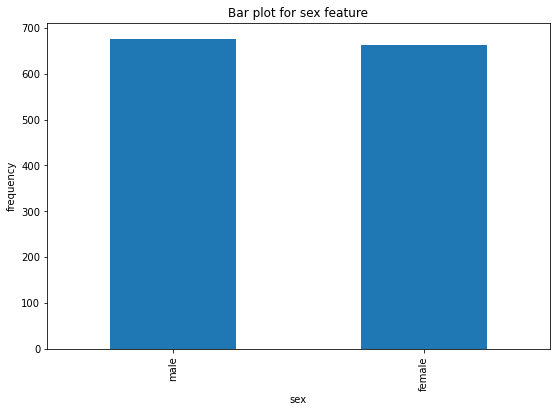

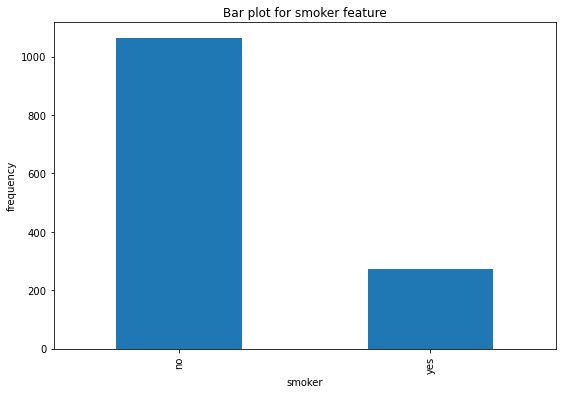

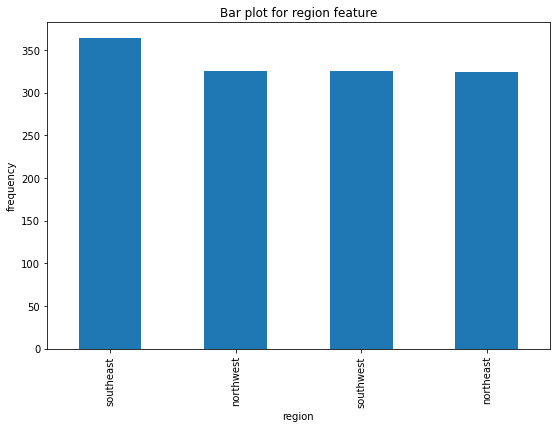

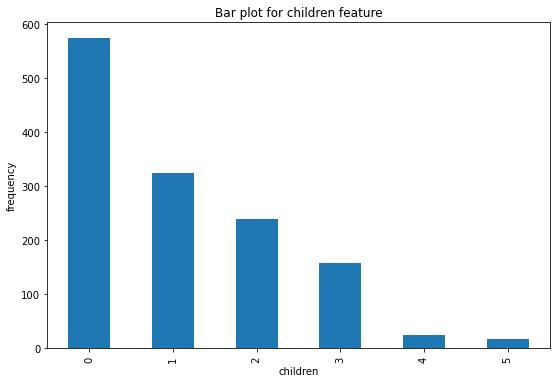

In [9]:
for column_name in categorical_features+['children']:
    # change type of data from object to categorical
    category_data = insurance_data[column_name].astype('category')
    # count values and set indexes order
    category_data_counts = insurance_data[column_name].value_counts()
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    category_data_counts.plot.bar(ax = ax)
    ax.set_title('Bar plot for '+column_name+' feature')
    ax.set_xlabel(column_name)
    ax.set_ylabel('frequency')
plt.show()

For region and sex features threre is roughly the same number of rows for each category (they show more uniform distribution). Smoker and children features are exception to this, but there is nothing suprising in theirs distribution.

If we know the distributions of the data in our dataset, we can start to look for relationships between the features and the charges label we want to predict. As earlier we will analyze children feature together with categoricals. At the beginning we can create scatter plots that show the intersection of feature and label values.

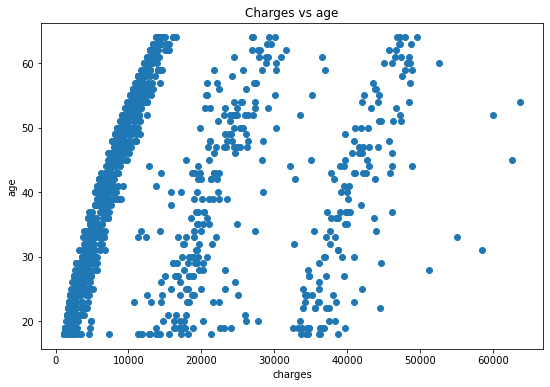

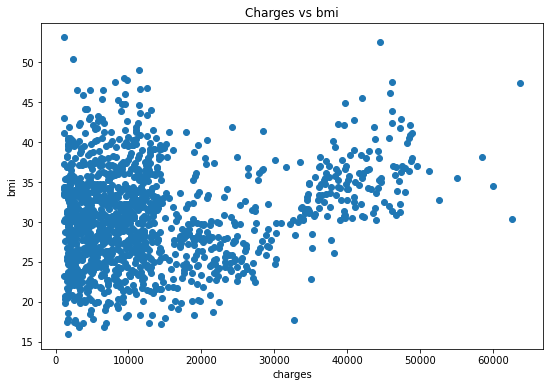

In [10]:
for column_name in ['age', 'bmi']:
    fig = plt.figure(figsize=(9,6))
    # Get the current Axes instance on the current figure
    ax = fig.gca()
    column = insurance_data[column_name]
    plt.scatter(x=insurance_data['charges'],y=column)
    ax.set_title('Charges vs '+column_name)
    ax.set_ylabel(column_name)
    ax.set_xlabel('charges')
plt.show()

We have 3 charges group for age data, in each group there is the same tendency - if age value goes up, charges rise as well. For charges vs bmi many data points are in the range of charges between 1000 to 15000 and are independent of the bmi value. After charges grows to 15000, the higher bmi the higher charges.

Pearson correlation coefficient (PCC) is a numerical measure of a relationship between two variables. It ranges from -1 to 1, where -1 means strong negative correlation, 0 means no correlation, 1 means strong positive correlation. One of the usecase of it is the situatuion when we want to see which variables describes our label the most. To calculate PCC we can use **Pandas corr** method and use **Seaborn heatmap** function to show it.

<AxesSubplot:>

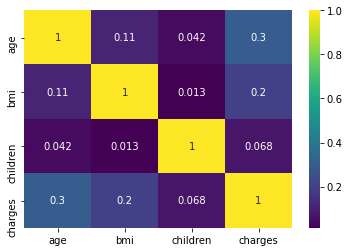

In [11]:
import seaborn as sns
sns.heatmap(insurance_data[['age','bmi','children','charges']].corr(), annot=True, cmap='viridis')

As we noted earlier, in both age and bmi features there is a small positive correlation with the label.

Now let's compare the categorical features to the label. We'll do this by creating box plots that show the distribution of charges counts for each category. The quickest way to do that is to combine Seaborn and Matplotlib libraries together.

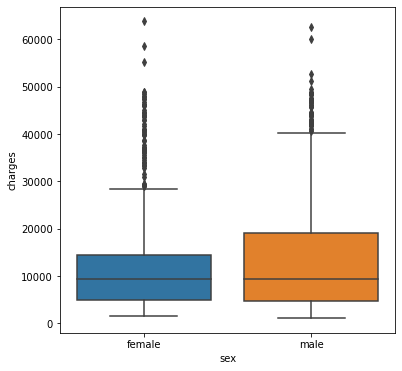

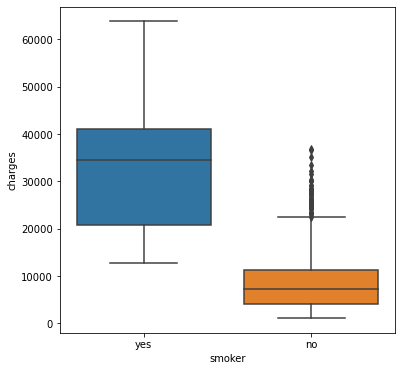

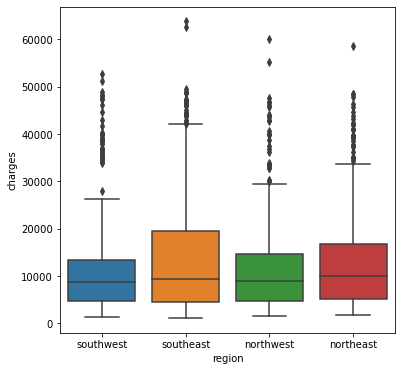

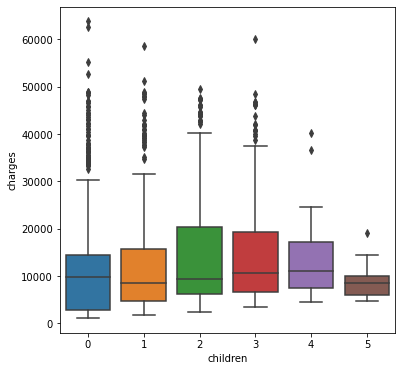

In [12]:
for column_name in categorical_features+['children']:
    # Set plot parameters using Matplotlib 
    fig = plt.figure(figsize=(6,6))
    # Use Seaborn to create box plots with automatically created labels
    sns.boxplot(x=column_name, y='charges', data=insurance_data)
plt.show()

Whatever the value of children, region or sex is, the median and values for Q1, Q3 (first and third quartile) for charges is nearly the same - that columns don't have much impact on charges value. There's a clear difference in the distribution of charges on smokers.

## Train a Regression Model

We've explored the data, the next step can be training a regression model that uses the features we have identified as potentially predictive to predict charges label. Label and features which we want use to train the model must be separated. For now we will use only numerical features, later in the data preprocessing topic we will learn how to proceed with object type features and what can we do with numeric features to improve efficiency of our model.

In [13]:
# Create numpy array X containing numeric features
X = insurance_data.drop(categorical_features+['charges'],axis=1).values

# Create numpy array y containing the labels
y = insurance_data['charges']

It's common practice to split data into two subsets before training the model:
- **training set** - typically larger set used to train the model,
- **test set** - smaller set used to validate the trained model.

This operation enable us to see how well the model performs on the new, probably unknown data. In most cases spliting is done randomly, that ensure us that the two subsets of data are statistically comparable (both sets will have a similar statistical distribution). To split data we will use **train_test_split** function from **Scikit-learn** library.

In [14]:
from sklearn.model_selection import train_test_split

# Split data into training set and test set with ratio 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Now we have four numpy arrays:
- **X_train** - array of feature values we'll use to train the model,
- **X_test** - the corresponding labels we'll use to train the model,
- **y_train** - array of feature values we'll use to validate the model,
- **y_test** - the corresponding labels we'll use to validate the model.

Having this four datasets we will train a model by fitting a linear regression algorithm to the training data. Linear regression tries to find a linear relationship between the X values and y label for which quality measure is the best.

**Scikit-learn** library include ordinary least squares Linear Regression. It's goal is to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

In [15]:
from sklearn.linear_model import LinearRegression

# Create Linear Regression model and fit it on the training set
model = LinearRegression().fit(X_train, y_train)
model

LinearRegression()

## Evaluate the Model

After training the model, we can use it to predict charges and compare these predictions to the actual values to evaluate how well the model is working.

In [16]:
import numpy as np

predictions = model.predict(X_test)
print('Predictions:', np.round(predictions)[:5])
print('Actual:', np.round(y_test[:5].values.T))

Predictions: [15773. 14442. 18422. 19490. 11521.]
Actual: [ 9725.  8548. 45702. 12950.  9644.]


Comparing predictions with real values isn't a very efficient way to evaluate  the performance of trained model. Better option will be comparison true and predicted labels by using scatter plot and adding a trend line. The trend line represents a behaviour of a set of data, it helps to see if there is a relationship (certain pattern) between variables.

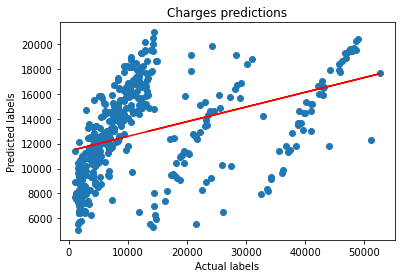

In [17]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual labels')
plt.ylabel('Predicted labels')
plt.title('Charges predictions')

# Overlay the regression line
z = np.polyfit(y_test, predictions, 1)
# It is convenient to use poly1d objects for dealing with polynomials
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='red')
plt.show()

We can see that the model isn't very accurate. There is some kind of overfitting - the chart is similar in shape to the charges vs age scatter plot. On the heatmap above we saw that from all the features used to train the model, age has the biggest correlation with the label and there can be the point. 

Residuals are the differences between trend line and the predictions. We can quantify the residuals using a number of commonly used evaluation metrics. Three of them are:
- **Coefficient of Determination (R-squared or R2)** - A percentage relative metrics that determines the proportion of variance in the dependent variable (the y values) that can be explained by the independent variable (the x values). Simplifying, it tells how much predictions fall into close range of the trend line in relative to the number of predictions. The range of it values is 0 to 1, the higher value the better the fit of the model.
- **Mean Square Error (MSE)** - The mean of the squared differences between the estimated and the actual values. The smaller value, the better the fit of the model. 
- **Root Mean Square Error (RMSE)** - A absolute metric in the same unit as the label. It is the square root of the MSE. The smaller the better. In a simplistic sense, it represents the average number of charges by which the predictions are wrong.

Using **Scikit-learn** we can calculate all of this metrics. Let's see them.

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

r2 = r2_score(y_test, predictions)
print("R2:", r2)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

R2: 0.14974128064925762
MSE: 135590303.17963448
RMSE: 11644.324934474926


We found out that our model don't have predictive power. Until now we only used an half of our features from the dataset to train the model. The process commonly done before model training, in the data mining step, is data preprocessing, so let's explore that topic.

## Preprocess the Data

The data for model training was loaded straight from source file, but it's common to perform some preprocessing of the data to make it easier for the algorithm to fit a model to it. There is a wide range of preprocessing transformations we can perform. Let's check two of them.

### Encoding categorical variables

Default data format used for models training is numeric, so we need to convert categorical features represented by text values into numeric representation. There are two types of encoding:
- ordinal encoding - assign a unique numeric value to each category,
- one hot encoding - create as much binary columns as categories, '1' means that the category is present in the row

### Scaling numeric features

Changing the scale of the variables that they are on the same scale. Well-known examples are:
- normalization - rescale the values to a specified range (commonly from 0 to 1),
- standarization - rescale the values to have a mean of 0 and a standard deviation of 1. 

In our case we will use **OneHotEncoder** for dealing with categorical variables and the simplest normalization function which rescale the values from range 0 to 1 - **MinMaxScaler**. Both functions are from **Scikit-learn** library.

> **Note:** Full list of Scikit-learn encoding and scaling function can be seen at: [Scikit-Learn preprocessing documentation](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing).

### But first: Experiment!

Let's see how scaling will change efficiency of our model and predicted vs actual labels plot. We must scale X_training set and adjust X_test set to it. This step is crucial, in view of the fact that we treat X_test set as new data.

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Create numpy array X containing numeric features
X = insurance_data.drop(categorical_features+['charges'],axis=1).values

# Create numpy array y containing the labels
y = insurance_data['charges']

# Divide sets into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create instance of scaler and scale nmeric features
scaler = MinMaxScaler(feature_range=(0, 1)).fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Create Linear Regression model and fit it on the training set
model = LinearRegression().fit(X_train, y_train)
predictions = model.predict(X_test)

We have our model trained. What result would we excpect?

R2: 0.1497412806492575
MSE: 135590303.17963448
RMSE: 11644.324934474926


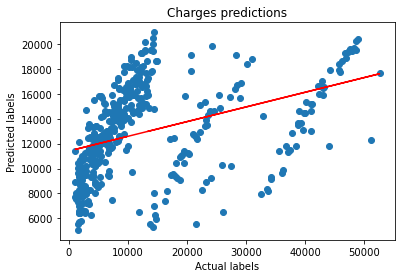

In [20]:
r2 = r2_score(y_test, predictions)
print("R2:", r2)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

plt.scatter(y_test, predictions)
plt.xlabel('Actual labels')
plt.ylabel('Predicted labels')
plt.title('Charges predictions')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='red')
plt.show()

There is no differenece to the scores received before training. Linear Regression is based on linear relationship between the label y and the features x. By changing the scale of the features we don't change that linear relationship.

### Pipelines

Preprocessing transformations can be applied using **Scikit-learn** feature called **pipelines**. It allow us to create a chain of preprocessing transformations and the algorithm at the end. It's very useful to build piepline, because when we want to use the model to the new data, we need to apply the same transformations as we make for model training. As we see in the experiment above, scaling numeric features don't affect Linear Regression model, but we will make it to show how tu built multi types column transformer.

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Assign all features to the X set; When we want to use column names when 
# defining preprocessor, we need data in pandas DataFrame format, otherwise
# we must use column idexes
X = insurance_data.drop(labels=['charges'],axis=1)

# Divide sets into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Encode categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Scale numeric features; Only for learning purposes
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler(feature_range=(0,1)))
])

# Combine processing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
    ])

# Create pipeline consisting preprocessing and model training steps
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model = pipeline.fit(X_train, y_train)
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'smoker', 'region']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'bmi',
                                                   'children'])])),
                ('regressor', LinearRegression())])

By referring to the name of the step, we can apply some methods to see how the steps working. If we want to see how our data look like after preprocessor step we can use **transform** method on preprocessor step of the pipeline.

In [22]:
pipeline['preprocessor'].transform(X_train)[:4]

array([[1.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.32970137,
        0.        ],
       [1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.45652174, 0.45305354,
        0.        ],
       [1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.73913043, 0.8283562 ,
        1.        ],
       [1.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.56521739, 0.2811407 ,
        0.        ]])

Using **transformers_** paramether and indexing we can access to the specific step of transformations. Let's use it to see feature names after **OneHotEncoding**.

In [23]:
pipeline['preprocessor'].transformers_[0][1]['onehot'].get_feature_names()

array(['x0_female', 'x0_male', 'x1_no', 'x1_yes', 'x2_northeast',
       'x2_northwest', 'x2_southeast', 'x2_southwest'], dtype=object)

Let's move to model evaluation.

R2: 0.7909160991789904
MSE: 33342497.826954585
RMSE: 5774.296305780868


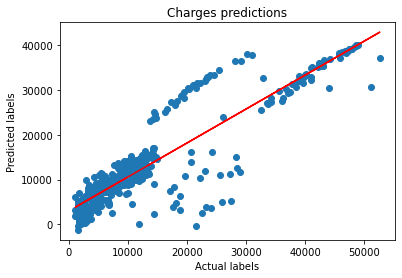

In [24]:
# Get predictions
predictions = model.predict(X_test)

# Display metrics
r2 = r2_score(y_test, predictions)
print("R2:", r2)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual labels')
plt.ylabel('Predicted labels')
plt.title('Charges predictions')

# Overlay the regression line
z = np.polyfit(y_test, predictions, 1)
# It is convenient to use poly1d objects for dealing with polynomials
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='red')
plt.show()

We have got high performance gains, because of using much more features. There is a worrying trend for charges higher than 20 thousand. Our model don't perform well after that value, so it's time to try with another algorithm.

## Experiment with Algorithms

There are many kinds of regression algorithm we could try to deal with the data, including:
- **Linear algorithms** - These include: Linear Regression, Lasso or Ridge.
- **Tree based algorithms** - Algorithms that build a decision tree to reach a prediction.
- **Ensemble algorithms** - Algorithms that combine the outputs of multiple algorithms to improve generalizability.

### Try Lasso - another Linear Algorithm

We can implement that by changing regressor in our pipeline.

R2: 0.7908711587809598
MSE: 33349664.448190328
RMSE: 5774.9168347423265


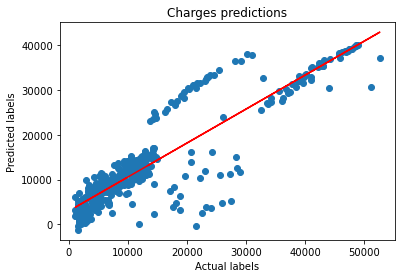

In [25]:
from sklearn.linear_model import Lasso

# Create pipeline consisting preprocessing and model training steps
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso())
])

model = pipeline.fit(X_train, y_train)

# Get predictions
predictions = model.predict(X_test)

# Display metrics
r2 = r2_score(y_test, predictions)
print("R2:", r2)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual labels')
plt.ylabel('Predicted labels')
plt.title('Charges predictions')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='red')
plt.show()

### Try a Decision Tree Algorithm

Type of algorithms that uses a tree-based approach. It's easiest to see how this works with an example. After training, we will print text representation of the tree.

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Create pipeline consisting preprocessing and model training steps
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor())
])

model = pipeline.fit(X_train, y_train)

# Get column names after ColumnTransformer
categorical_column_names = pipeline['preprocessor'].transformers_[0][1]['onehot'].get_feature_names()
all_column_names = np.append(categorical_column_names, numeric_features)

# Visualize the model tree by extracting algorithm from pipeline
tree = export_text(model[1], feature_names=list(all_column_names))
print(tree)

|--- x1_no <= 0.50
|   |--- bmi <= 0.38
|   |   |--- age <= 0.50
|   |   |   |--- age <= 0.09
|   |   |   |   |--- bmi <= 0.15
|   |   |   |   |   |--- children <= 0.20
|   |   |   |   |   |   |--- value: [13747.87]
|   |   |   |   |   |--- children >  0.20
|   |   |   |   |   |   |--- value: [12829.46]
|   |   |   |   |--- bmi >  0.15
|   |   |   |   |   |--- bmi <= 0.16
|   |   |   |   |   |   |--- value: [20167.34]
|   |   |   |   |   |--- bmi >  0.16
|   |   |   |   |   |   |--- bmi <= 0.26
|   |   |   |   |   |   |   |--- children <= 0.10
|   |   |   |   |   |   |   |   |--- value: [15518.18]
|   |   |   |   |   |   |   |--- children >  0.10
|   |   |   |   |   |   |   |   |--- value: [15359.10]
|   |   |   |   |   |   |--- bmi >  0.26
|   |   |   |   |   |   |   |--- children <= 0.40
|   |   |   |   |   |   |   |   |--- bmi <= 0.32
|   |   |   |   |   |   |   |   |   |--- x2_northeast <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- x0_male <= 0.50
|   |   |   |   |   |   |  

R2: 0.7212575393778291
MSE: 44450911.09875072
RMSE: 6667.151648099113


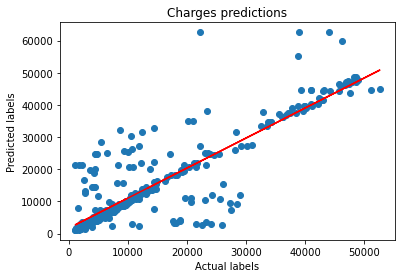

In [27]:
# Get predictions
predictions = model.predict(X_test)

# Display metrics
r2 = r2_score(y_test, predictions)
print("R2:", r2)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual labels')
plt.ylabel('Predicted labels')
plt.title('Charges predictions')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='red')
plt.show()

### Try an Ensemble Algorithm

Ensemble algorithms work by combining multiple base estimators to produce an optimal model, either by applying an aggregate function to a collection of base models (sometimes referred to a bagging) or by building a sequence of models that build on one another to improve predictive performance (referred to as boosting).

Let's try a Random Forest model. It applies an averaging function to multiple Decision Tree models for a better overall model.

R2: 0.859898655777116
MSE: 22341886.424358957
RMSE: 4726.720472416257


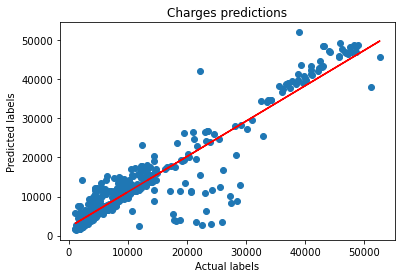

In [28]:
from sklearn.ensemble import RandomForestRegressor

# Create pipeline consisting preprocessing and model training steps
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

model = pipeline.fit(X_train, y_train)

# Get predictions
predictions = model.predict(X_test)

# Display metrics
r2 = r2_score(y_test, predictions)
print("R2:", r2)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual labels')
plt.ylabel('Predicted labels')
plt.title('Charges predictions')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='red')
plt.show()

The result is much better than earlier. Let's try also a boosting ensemble algorithm. Like in Random Forest Regressor it used multiple trees, but each tree is built on the outputs of the previous one to incrementally reduce the error in the model.

R2: 0.888017272451061
MSE: 17857825.663743123
RMSE: 4225.8520636367675


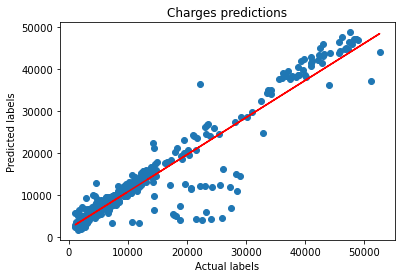

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

# Create pipeline consisting preprocessing and model training steps
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor())
])

model = pipeline.fit(X_train, y_train)

# Get predictions
predictions = model.predict(X_test)

# Display metrics
r2 = r2_score(y_test, predictions)
print("R2:", r2)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual labels')
plt.ylabel('Predicted labels')
plt.title('Charges predictions')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='red')
plt.show()

Our model is getting better and better. Let's see if we can improve the performance of these models even further.

## Optimize Hyperparameters

If we look at the definition of GradientBoostingRegressor or other previously used algorithm we can notice many parameters that control the way the model is trained - commonly known as hyperparameters. A list for each estimator can be obtain in Scikil-learn documentation. 

Default values for hyperparameters provided by Scikit-learn works well, but there may be some pros of modyfying it. We can achieve predictive performance or reduce training time. 

Without deep knowledge about how algorithm works there is no specified recipe how to improve the performance, but Scikit-learn provides a way to tune hyperparameters by trying multiple combinations. A grid of possible values is called **grid search**.

Let's create **grid search** for the **learning_rate** and **n_estimators** hyperparameters present in the GradientBoostingRegressor.

In [30]:
from sklearn.model_selection import GridSearchCV

# Create dictionary containing parameter names and list of values;
# Parameters of pipelines can be set using ‘__’ separated parameter names
param_grid = {
 'regressor__learning_rate': [0.05, 0.1, 0.5, 1.0],
 'regressor__n_estimators' : [10, 50, 100, 150]
}

# Create pipeline consisting preprocessing and model training steps
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor())
])

# Create grid search
search = GridSearchCV(pipeline, param_grid, n_jobs=-1)
search.fit(X_train, y_train)

print("Mean cross-validated score of the best_estimator\
for best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Mean cross-validated score of the best_estimatorfor best parameter (CV score=0.839):
{'regressor__learning_rate': 0.05, 'regressor__n_estimators': 100}


R2: 0.8916182637667143
MSE: 17283577.50477159
RMSE: 4157.3522228422735


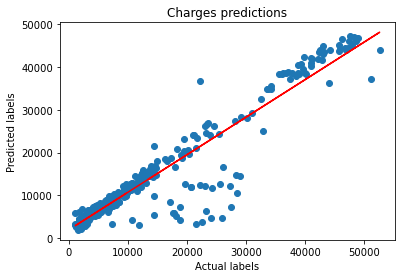

In [31]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(learning_rate=0.05, n_estimators=100))
])

model = pipeline.fit(X_train, y_train)

# Get predictions
predictions = model.predict(X_test)

# Display metrics
r2 = r2_score(y_test, predictions)
print("R2:", r2)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual labels')
plt.ylabel('Predicted labels')
plt.title('Charges predictions')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='red')
plt.show()

We've now seen a number of common techniques used to train predictive models for regression. In real life project we will try out more algorithms, hyperparameters, and preprocessing transformations, but in that notebook we have got general idea. After finding best model it's time to save it.

## Saving and using the Trained Model

Firstly, let's save our model.

In [32]:
import joblib

# Save the model as a pickle file
filename = 'Data/insurance_cost.pkl'
joblib.dump(model, filename)

['Data/insurance_cost.pkl']

We can use saved model whenever we need it.

In [33]:
# Load the model from the file
loaded_model = joblib.load(filename)

# Create numpy array containing a new observation
X_new = pd.DataFrame(X_test.iloc[0]).T

In [34]:
X_new

,age,sex,bmi,children,smoker,region
578,52,male,30.2,1,no,southwest


In [35]:
# Use the model to predict insurance cost
result = loaded_model.predict(X_new)
result

array([12566.11212335])

In [36]:
# Show original value
y_test.iloc[0]

9724.53

## Second experiment

Let's try cluster age feature, add cluster number as a feature, train regression model again and se what happened. Firstly, we need to separate features which will be used for clustering and split them into train and test sets.

In [37]:
from sklearn.mixture import GaussianMixture

X_clustering = insurance_data[['age','charges']]
X_train_clustering, X_test_clustering = train_test_split(X_clustering, test_size=0.3, random_state=0)

Based on the [Overview of clustering methods](https://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods) we will use **Gaussian Mixture** for clustering. After that let's see the performance of that clustering model by plotting clusters.

<AxesSubplot:xlabel='charges', ylabel='age'>

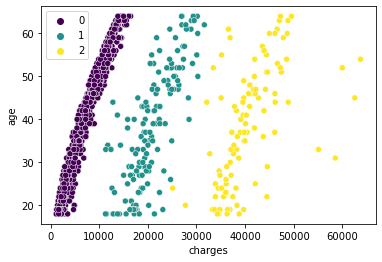

In [38]:
# Create clustering model, fit it and predict labels for training data
model = GaussianMixture(n_components=3).fit(X_train_clustering)
clusters = model.predict(X_train_clustering)

# Plot data divided into clusters
sns.scatterplot(x=X_train_clustering.iloc[:,1],y=X_train_clustering.iloc[:,0], 
                hue=clusters, palette='viridis')

<AxesSubplot:xlabel='charges', ylabel='age'>

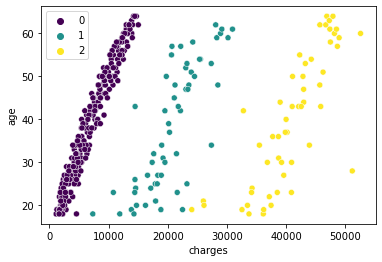

In [39]:
# Predict labels for test data
cluster_predictions = model.predict(X_test_clustering)

# Plot data divided into clusters
sns.scatterplot(x=X_test_clustering.iloc[:,1],y=X_test_clustering.iloc[:,0], 
                hue=cluster_predictions, palette='viridis')

Based on the scatter plot the clusters are well separated. To see if cluster number equal to 3 is the best option we should use some kind of cluster's performance measurement like an elbow method or silhouette value, but we won't complicate the experiment. 

Now, we will add new feature to our datasets - cluster number.

In [45]:
clusters = pd.DataFrame(clusters, columns=['Cluster'])
cluster_predictions = pd.DataFrame(cluster_predictions, columns=['Cluster'])

X_train = pd.concat([X_train.reset_index(drop=True), clusters],axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), cluster_predictions],axis=1)

To use our new dataset we need to modify ColumnTransformer by adding new feature to numeric transformer. After that we can check the quality measures of our model.

R2: 0.9733395626267518
MSE: 4251525.687499826
RMSE: 2061.9228131770174


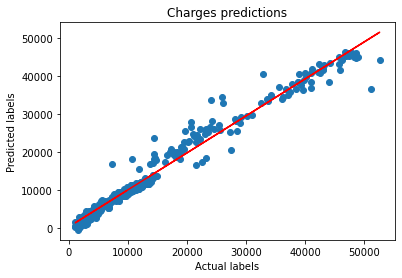

In [48]:
# Combine processing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features+['Cluster'])
    ])

# Create pipeline consisting preprocessing and model training steps
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model = pipeline.fit(X_train, y_train)

# Get predictions
predictions = model.predict(X_test)

# Display metrics
r2 = r2_score(y_test, predictions)
print("R2:", r2)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual labels')
plt.ylabel('Predicted labels')
plt.title('Charges predictions')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='red')
plt.show()

R2 and RMSE have changed considerably. The other way to deal with clusters will be clustering our data by 'age' feature like above, but for each cluster train an regression model separatelly.